In [2]:
import pandas as pd
import seaborn as sns
print(sns.__version__)

0.13.2


# Phase 1: prepare dataset
## load data set

In [3]:
df = pd.read_csv('flying-etiquette.csv')
# df.head()
# df['How tall are you?'].value_counts()

## Create new Height column

In [4]:
df['Height (inches)'] = df['How tall are you?']
df['Height (inches)'].unique()

array([nan, '6\'3"', '5\'8"', '5\'11"', '5\'7"', '5\'9"', '6\'2"',
       '6\'0"', '5\'6"', '6\'1"', '5\'10"', '5\'5"', '6\'4"',
       '6\'6" and above', 'Under 5 ft.', '6\'5"', '5\'4"', '5\'0"',
       '5\'3"', '5\'1"', '5\'2"'], dtype=object)

### part a: convert under 5 ft to 5 ft, 6'6" and above to 6'6"

In [5]:
df.loc[df['Height (inches)'] == 'Under 5 ft.', 'Height (inches)'] = '5\'0"'
df.loc[df['Height (inches)'] == '6\'6" and above', 'Height (inches)'] = '6\'6"'

### Part b: convert heights to inches

In [6]:
newVals = []
for height in (df['Height (inches)']):
    if type(height) != str:
        newVals.append(None)
    else:
        feet = height.split("'")[0]
        inches = height.split("'")[1].split('"')[0]
        newVals.append( ( int(feet)*12 + int(inches) ) )
df['Height (inches)'] = newVals
# check new version of column:
df['Height (inches)']

0        NaN
1       75.0
2       68.0
3       71.0
4       67.0
        ... 
1035    67.0
1036     NaN
1037     NaN
1038     NaN
1039    75.0
Name: Height (inches), Length: 1040, dtype: float64

# Part 3: Reports & Visualizations

## a: % breakdown of participants by age

In [7]:
df.Age.unique()

array([nan, '30-44', '18-29', '45-60', '> 60'], dtype=object)

[Text(0.5, 1.0, 'Percent of participants by age')]

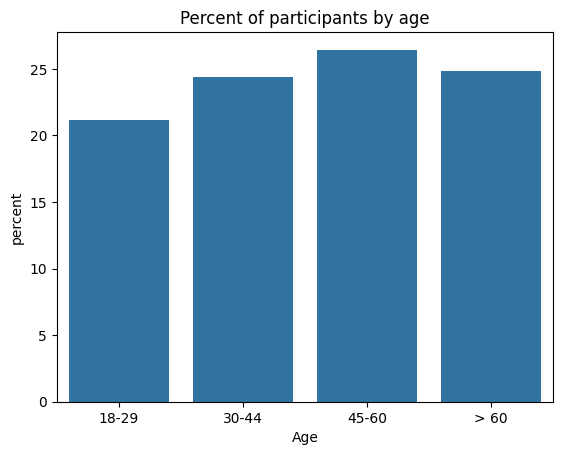

In [11]:
age_brackets = ['18-29', '30-44', '45-60', '> 60']
sns.countplot(data=df, x='Age', order=age_brackets, stat='percent').set(title='Percent of participants by age')

## b: is it rude to ask to switch seats

In [15]:
# find the actual names of all the columns so we can find the one for this question
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 28 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   RespondentID                                                                                                                              1040 non-null   int64  
 1   How often do you travel by plane?                                                                                                         1040 non-null   object 
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object 
 3   How tall are you?                                    

In [16]:
# since these column names are stupidly long, store this one as a var
switchSeats = 'Is it rude to ask someone to switch seats with you in order to be closer to friends?'
# get the response values
df[switchSeats].unique()

array([nan, 'No, not at all rude', 'Yes, somewhat rude', 'Yes, very rude'],
      dtype=object)

[Text(0.5, 0, 'Response'),
 Text(0.5, 1.0, 'Is it rude to ask someone to switch seats with you in order to be closer to friends?')]

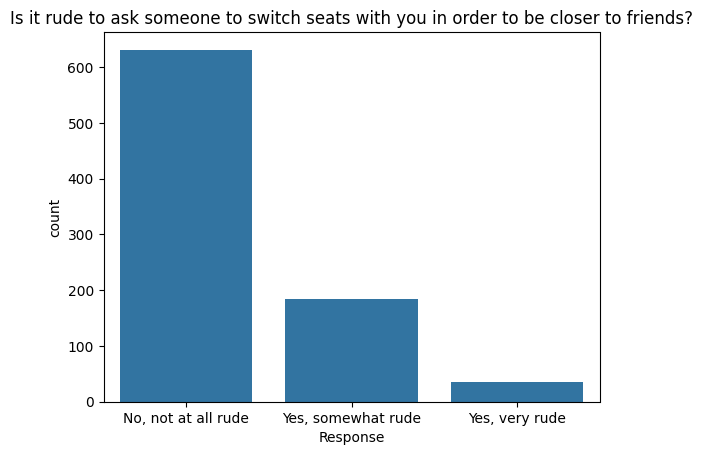

In [18]:
# graph the responses
sns.countplot(data=df, x=switchSeats).set(xlabel="Response", title=switchSeats)

### Is it rude to ask to switch seats - by age group

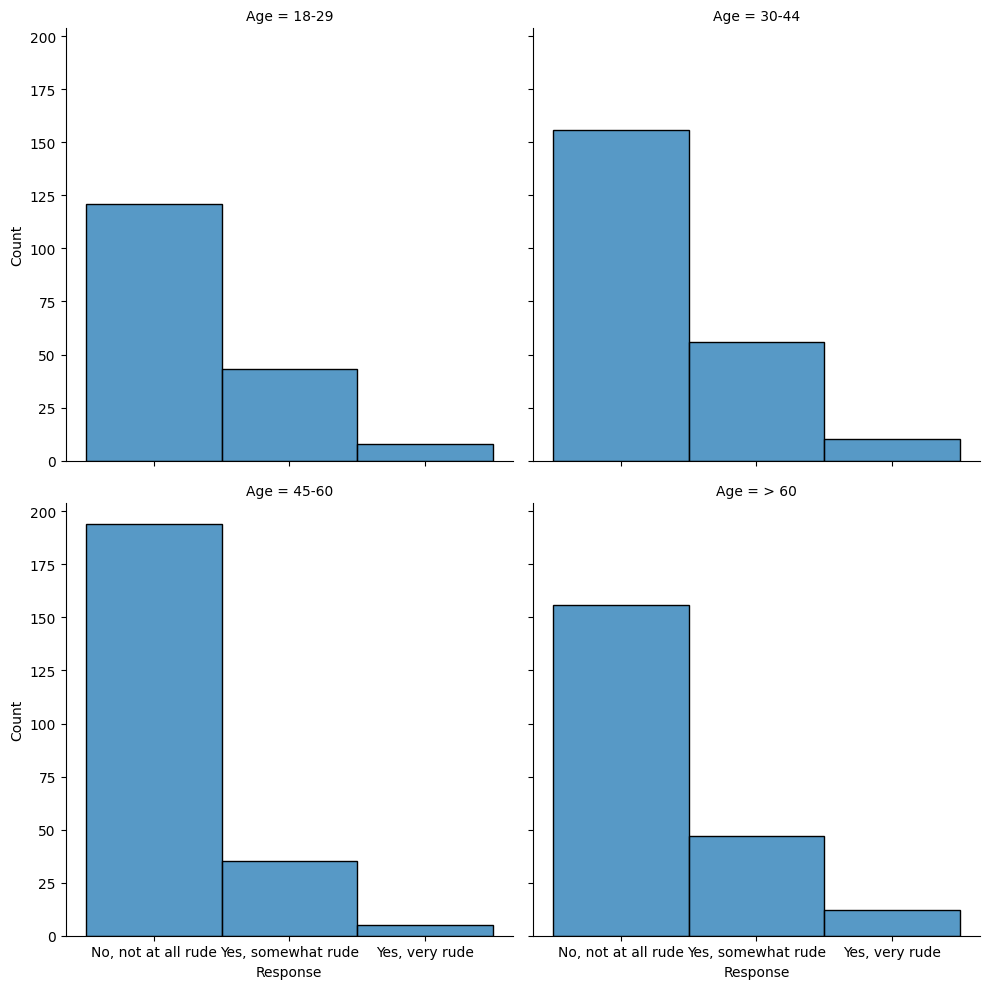

In [23]:
sns.displot(data=df, x=switchSeats, col="Age", col_wrap=2, col_order=age_brackets).set(xlabel="Response")

<Axes: xlabel='Do you ever recline your seat when you fly?', ylabel='Height (inches)'>

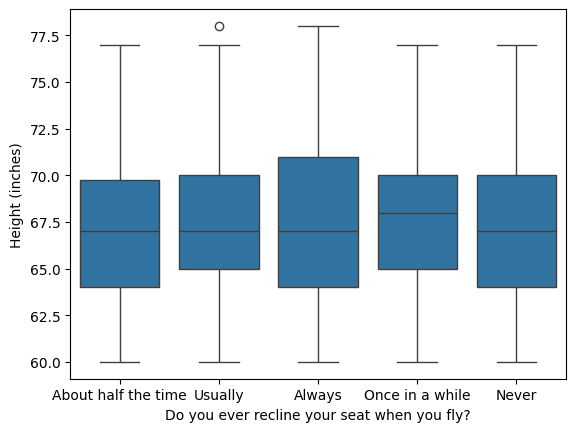

In [25]:
sns.boxplot(data=df, y='Height (inches)', x='Do you ever recline your seat when you fly?')